In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [12]:
data = pd.read_csv('./data/dieta-clean.csv')

In [32]:
data = data[['estado','edad','time','peso total','hcrop']].dropna()

In [36]:
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['period'] = data['time'].apply(lambda x: 'M' if x < pd.to_datetime('13:00:00').time() else 'V')

In [38]:
data = data[['estado','edad','period','peso total','hcrop']]

In [39]:
data

,estado,edad,period,peso total,hcrop
0,NM,J,V,9.7584,0.000000
1,NM,J,V,3.9632,0.000000
2,AZ,A,V,5.4562,0.785803
3,NM,J,V,4.4976,0.464732
4,AZ,J,V,5.4630,1.680150
...,...,...,...,...,...
314,NM,A,V,0.3501,0.112925
315,NM,J,M,0.1977,0.000000
316,NM,J,V,2.6084,0.065394
317,NM,A,V,7.3265,0.000000


Distribución del peso en el buche de las aves

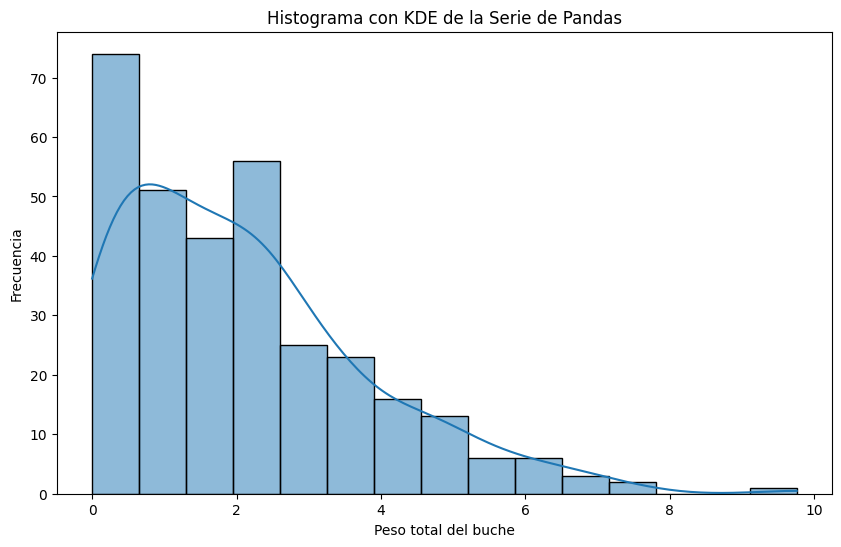

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['peso total'], kde=True)
plt.title('Histograma con KDE del peso total del buche')
plt.xlabel('Peso total del buche')
plt.ylabel('Frecuencia')
plt.show()

Ahora se prueba la distribución del log del peso total del buche

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


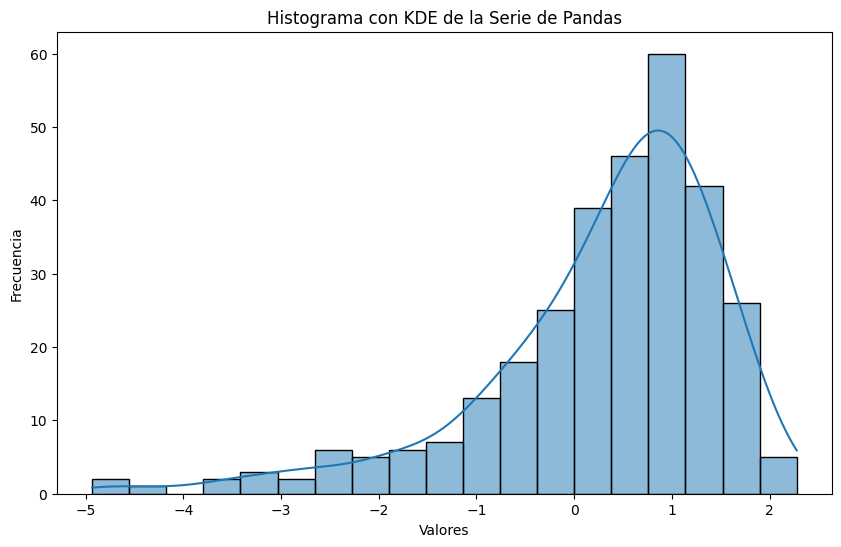

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['peso total']), kde=True)
plt.title('Histograma con KDE del logaritmo del peso del buche')
plt.xlabel('Logaritmo del peso total del buche')
plt.ylabel('Frecuencia')
plt.show()

Parece ser normal con un con sesgo hacia la izquierda, se procede a hacer pruebas de normalidad para el log

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


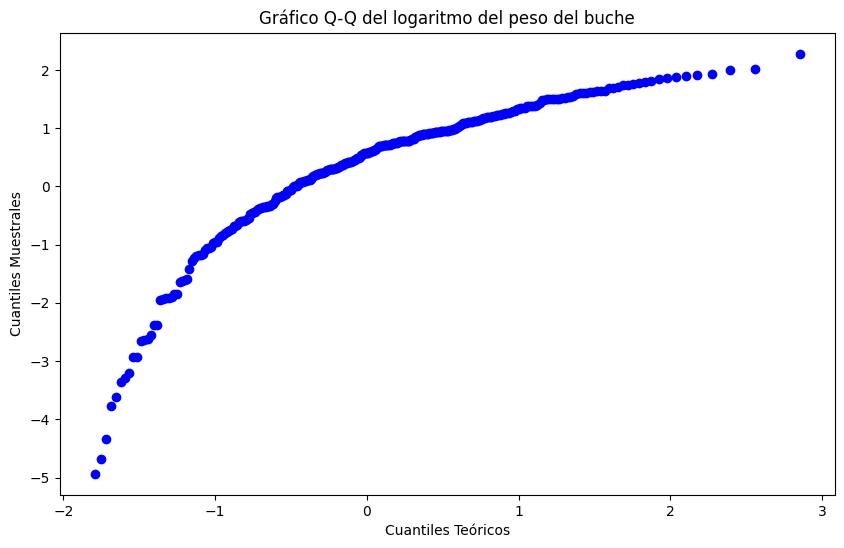

In [22]:
plt.figure(figsize=(10, 6))
stats.probplot(np.log(data['peso total']), dist="norm", plot=plt)
plt.title('Gráfico Q-Q del logaritmo del peso del buche')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.show()

In [26]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(np.log(data['peso total']))
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("La serie parece provenir de una distribución normal (no se rechaza H0).")
else:
    print("La serie no parece provenir de una distribución normal (se rechaza H0).")

Shapiro-Wilk Test: Estadístico=nan, p-valor=1.0
La serie parece provenir de una distribución normal (no se rechaza H0).


No hay evidencia para rechazar que esta muestra del peso del buche viene de una distribución lognormal, por lo que se procedera a hacer pruebas t con el log del peso del buche para distintos grupos.

Pruebas T para el peso

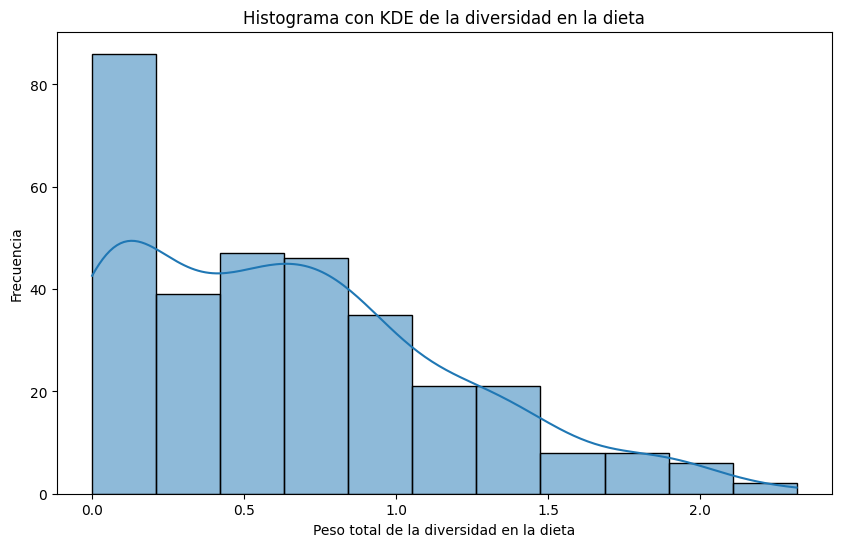

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['hcrop'], kde=True)
plt.title('Histograma con KDE de la diversidad en la dieta')
plt.xlabel('Peso total de la diversidad en la dieta')
plt.ylabel('Frecuencia')
plt.show()

Se probará nuevamente con el log de la variable

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


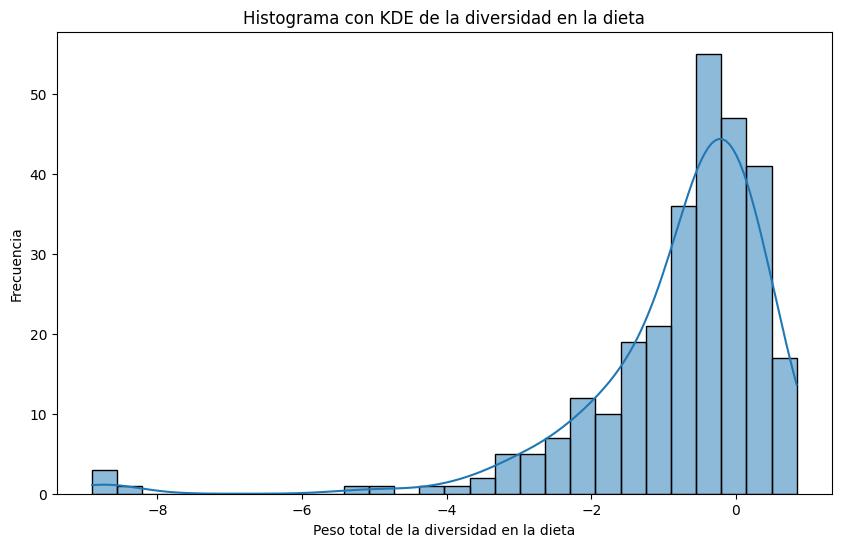

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['hcrop']), kde=True)
plt.title('Histograma con KDE de la diversidad en la dieta')
plt.xlabel('Peso total de la diversidad en la dieta')
plt.ylabel('Frecuencia')
plt.show()

Parece suceder lo mismo que con el peso

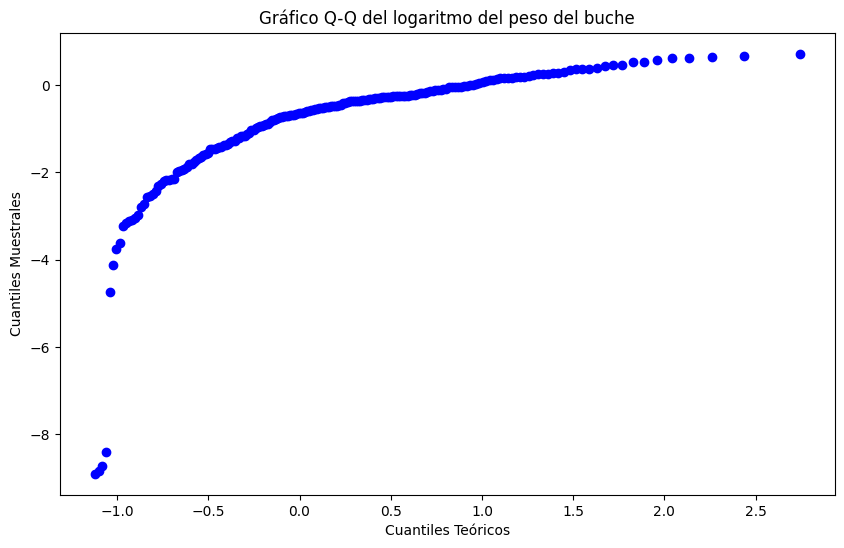

In [42]:
plt.figure(figsize=(10, 6))
stats.probplot(np.log(data['hcrop']), dist="norm", plot=plt)
plt.title('Gráfico Q-Q del logaritmo del indice de diverdad en la dieta')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.show()

In [43]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(np.log(data['hcrop']))
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("La serie parece provenir de una distribución normal (no se rechaza H0).")
else:
    print("La serie no parece provenir de una distribución normal (se rechaza H0).")

Shapiro-Wilk Test: Estadístico=nan, p-valor=1.0
La serie parece provenir de una distribución normal (no se rechaza H0).


No hay evidencia para rechazar la hipotesis de que la muestra de la diversidad de la dieta no viene de una distribución normal, se procedera con las pruebas t.